<a href="https://colab.research.google.com/github/TasneemAhmed/Amazon-Customers-Data-Analysis/blob/main/Amazon_Customers_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  #regular expression
import plotly.express as px

In [2]:
!pip install TextBlob

In [3]:
!pip install wordcloud

In [4]:
#for sentiment Analysis
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import string

In [5]:
!pip install nltk

In [6]:
#to remove stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [105]:
import nltk
from nltk.corpus import stopwords

In [68]:
#to exract HTML tags from Customers Text
from bs4 import BeautifulSoup

# **2. Loading Data**

In [7]:
df = pd.read_csv('/content/sample_data/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# **3. Sentiment Analysis**
(what feelings (angry, happy...) for particular person

In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
text = df['Summary'][0]
text

'Good Quality Dog Food'

**sentiment.polarity:**
- if Postitve: positive sentiment
- Negtive: negtive sentiment
- Zero: neutral sentiment

In [10]:
TextBlob(text).sentiment.polarity

0.7

In [11]:
#add sentiment polarity for each summary text which for each person
polarity = []

for cell in df['Summary']:
  try:
    polarity.append(TextBlob(cell).sentiment.polarity)
  except:
    polarity.append(0)
                 
len(polarity)

568454

In [12]:
#add polarity list into dataframe as new column
df['Polarity'] = polarity

In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


**3.1 Positive Analysis**

In [14]:
positive_data = df[df['Polarity']>0]
positive_data.head()
len(positive_data)

331665

In [15]:
total_summary = ''.join(positive_data['Summary'])
total_summary[0:1000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat!  Just as good as the expensive brands!Wonderful, tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this "diet" food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy!Love it!GREAT SWEET CANDY!Always freshDelicious product!Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine!Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry!satisfyingLove Gluten Free Oatmeal!!!GOOD WAY TO START THE DAY....Wife\'s favorite BreakfastWhy wouldn\'t you buy oatmeal from Mcanns? Tastes great!Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won\'t order the Variety PackHOT!  And good!  Came back for more  :)Roasts up a smooth brewOur guests love it!Awesome Deal!Awsome - Kids in neighborhood loved us!great deal.Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good.How much would you

In [97]:
#replace anything without char and space with empty string applied in total_summary
total_summary = re.sub('[^a-zA-Z ]', '', total_summary)

In [98]:
total_summary[0:1000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat  Just as good as the expensive brandsWonderful tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this diet food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasyLove itGREAT SWEET CANDYAlways freshDelicious productGreat Bargain for the PriceThe Best Hot Sauce in the WorldGreat machineBest of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurrysatisfyingLove Gluten Free OatmealGOOD WAY TO START THE DAYWifes favorite BreakfastWhy wouldnt you buy oatmeal from Mcanns Tastes greatGood Hot BreakfastGreat taste and conveniencegoodVery good but next time I wont order the Variety PackHOT  And good  Came back for more  Roasts up a smooth brewOur guests love itAwesome DealAwsome  Kids in neighborhood loved usgreat dealBetter price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so goodHow much would you pay for a bag of chocolate pretzels

In [99]:
#set because gurantee uniquness of stop words like (and, the, or....)
stop_words = set(STOPWORDS)

(-0.5, 999.5, 499.5, -0.5)

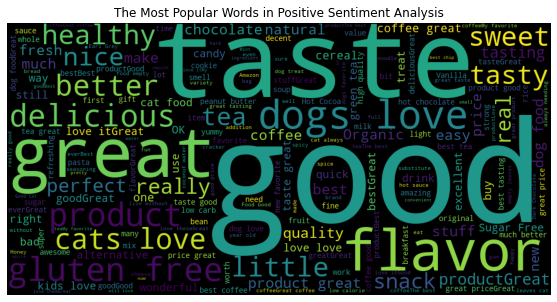

In [100]:
#will generat WordCloud to show this in total summary
word_cloud = WordCloud(width=1000, height=500, stopwords=stop_words).generate(total_summary)
plt.figure(figsize=(15,5))
plt.title('The Most Popular Words in Positive Sentiment Analysis')
plt.imshow(word_cloud)
plt.axis('off')

**3.2 Negative Analysis**

In [19]:
negative_data = df[df['Polarity']<0]
negative_data.head()
len(negative_data)

52516

In [20]:
total_summary2 = ''.join(negative_data['Summary'])
total_summary2[0:1000]

"poor tasteNasty No flavorHow can you go wrong!pretty expensivestale product.Bigger then other brandsOrder only in cold weatherBaddisappointingMy every day green teaBROKEN BOTTLE BOTTOMS!Tasteless but low calorieMarley's Mellow Mood Lite - Half Tea Half LemonadeNearly killed the catsCHANGED FORMULA MAKES CATS SICK!!!!Not a real teaMcclures bloody Mary mixNot GoodEukanuba puppy small breed dog foodMy everyday cup of TeaDisappointedSad outcomeDon't Waste Your MoneyDisappointed!sugar in the rawGood product but terrible agricultural practicesSugar in the rawSugar in the rawtoo expensiveNot sureSo awful I can barely describeAWFULBitterA saving grace for Green Mountain Coffee...Fantastic Chicken Noodle soupHeinz no more!DisappointingWaste of moneyHam BaseMSG Ham BaseLove the product disappointed in the shipping.poor item packagingAwfuldisappointingHarda slight taste of jalapenoHeavy on the VinegarThese chips make me weak at the kneesNot bad but a little hard to get used toFirm quality chipNo

In [101]:
#replace anything without char and space with empty string applied in total_summary
total_summary2 = re.sub('[^a-zA-Z ]', '', total_summary2)
total_summary2

'poor tasteNasty No flavorHow can you go wrongpretty expensivestale productBigger then other brandsOrder only in cold weatherBaddisappointingMy every day green teaBROKEN BOTTLE BOTTOMSTasteless but low calorieMarleys Mellow Mood Lite  Half Tea Half LemonadeNearly killed the catsCHANGED FORMULA MAKES CATS SICKNot a real teaMcclures bloody Mary mixNot GoodEukanuba puppy small breed dog foodMy everyday cup of TeaDisappointedSad outcomeDont Waste Your MoneyDisappointedsugar in the rawGood product but terrible agricultural practicesSugar in the rawSugar in the rawtoo expensiveNot sureSo awful I can barely describeAWFULBitterA saving grace for Green Mountain CoffeeFantastic Chicken Noodle soupHeinz no moreDisappointingWaste of moneyHam BaseMSG Ham BaseLove the product disappointed in the shippingpoor item packagingAwfuldisappointingHarda slight taste of jalapenoHeavy on the VinegarThese chips make me weak at the kneesNot bad but a little hard to get used toFirm quality chipNot  Very Creamy o

(-0.5, 999.5, 499.5, -0.5)

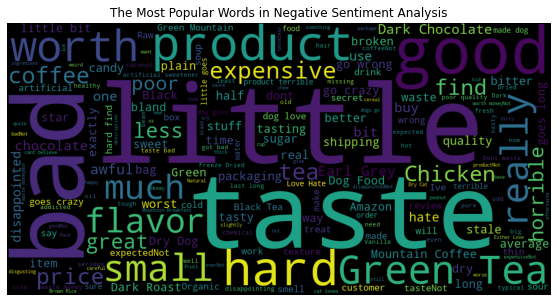

In [102]:
#will generat WordCloud to show this in total summary2
word_cloud = WordCloud(width=1000, height=500, stopwords=stop_words).generate(total_summary2)
plt.figure(figsize=(15,5))
plt.title('The Most Popular Words in Negative Sentiment Analysis')
plt.imshow(word_cloud)
plt.axis('off')

# **4. Analyzing types of Customers Amazon can recommernd more products**

In [23]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Polarity'],
      dtype='object')

In [24]:
summary_data = df.groupby('UserId').aggregate({'ProductId':'count', 'Score':'mean', 'Summary':'count'}).reset_index().sort_values(by='Summary', ascending=False)

In [25]:
summary_data.head()

,UserId,ProductId,Score,Summary
182011,A3OXHLG6DIBRW8,448,4.535714,448
65586,A1YUL9PCJR3JTY,421,4.494062,421
252275,AY12DBB0U420B,389,4.647815,389
82919,A281NPSIMI1C2R,365,4.841096,365
66162,A1Z54EM24Y40LL,256,4.453125,256


In [26]:
#rename columns 
summary_data.columns = ['User ID', 'Products_Num_User_Purchased', 'Avg_Scores', 'Num_Summary']

In [27]:
#top 10 users
top_cutomers = summary_data[0:10]
top_cutomers

,User ID,Products_Num_User_Purchased,Avg_Scores,Num_Summary
182011,A3OXHLG6DIBRW8,448,4.535714,448
65586,A1YUL9PCJR3JTY,421,4.494062,421
252275,AY12DBB0U420B,389,4.647815,389
82919,A281NPSIMI1C2R,365,4.841096,365
66162,A1Z54EM24Y40LL,256,4.453125,256
55736,A1TMAVN4CEM8U8,204,4.833333,204
110863,A2MUGFV2TDQ47K,201,3.751244,201
191283,A3TVZM3ZIXG8YW,199,1.000000,199
183161,A3PJZ8TU8FDQ1K,178,4.601124,178
238453,AQQLWCMRNDFGI,176,3.954545,176


In [28]:
fig = px.bar(top_cutomers, x='User ID', y='Products_Num_User_Purchased',
             hover_data=['Avg_Scores', 'Num_Summary'], color='Products_Num_User_Purchased',
             labels={'Products_Num_User_Purchased':'Products Numbers Cutomer Purchased'})
fig.show()

# **5. Analyze on Sample of data**

In [29]:
#sample(): choose random sample of size= 2000 
sample_data = df.sample(n=2000)
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
254180,254181,B001EQ5JLY,A3RORFTPJX13XD,Jason,0,0,5,1324339200,Good,"It's really good, I bought it and drink it all...",0.700
77128,77129,B001OCKIP0,A1DRM3JV6T5O6P,W. Oliver,0,0,5,1244160000,Very good,"I love this granola. It is made with oatmeal, ...",0.910
414480,414481,B005TBURAI,A2M9WKI8AM60KH,"A. Miranda ""Costa Rica Baby""",14,14,5,1265673600,So happy to share with you!,I am Costa Rican and have enjoyed Lizano since...,1.000
326181,326182,B000DT7QDM,A3NLI2Y7M58686,"Bella Boxer ""Online gaming girl""",0,0,5,1298851200,My dogs love them!,"My dogs love pupperoni lean, and I love being ...",0.625
360078,360079,B0001KH5NO,A2OEOITTOW3YTZ,"Michael E. Reynolds ""SCPOMIKEY""",8,8,3,1197331200,Tomatoe Preserves,Since Smucker's stopped making Tomatoe preserv...,0.000


In [30]:
#chech if there is any nulls
sample_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Polarity                  0
dtype: int64

In [31]:
#check if there is any duplicates
sample_data.duplicated().sum()

0

# **5.1 Analyze length of Text Feedback of Customers**

In [33]:
len(sample_data['Text'][360078].split(' '))

105

In [34]:
def calc_len(text):
  return len(text.split(' '))

In [35]:
sample_data['Text Length'] = sample_data['Text'].apply(calc_len)
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity,Text Length
254180,254181,B001EQ5JLY,A3RORFTPJX13XD,Jason,0,0,5,1324339200,Good,"It's really good, I bought it and drink it all...",0.700,21
77128,77129,B001OCKIP0,A1DRM3JV6T5O6P,W. Oliver,0,0,5,1244160000,Very good,"I love this granola. It is made with oatmeal, ...",0.910,50
414480,414481,B005TBURAI,A2M9WKI8AM60KH,"A. Miranda ""Costa Rica Baby""",14,14,5,1265673600,So happy to share with you!,I am Costa Rican and have enjoyed Lizano since...,1.000,86
326181,326182,B000DT7QDM,A3NLI2Y7M58686,"Bella Boxer ""Online gaming girl""",0,0,5,1298851200,My dogs love them!,"My dogs love pupperoni lean, and I love being ...",0.625,54
360078,360079,B0001KH5NO,A2OEOITTOW3YTZ,"Michael E. Reynolds ""SCPOMIKEY""",8,8,3,1197331200,Tomatoe Preserves,Since Smucker's stopped making Tomatoe preserv...,0.000,105


In [36]:
px.box(sample_data, y='Text Length')

**5.2 Analze Score**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



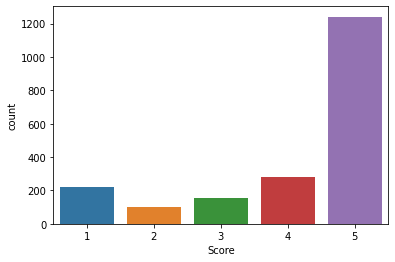

In [37]:
sns.countplot(sample_data['Score'])

# **6. Analyzing Behaviour of customers**

 **6.1 First prepare 'Text' feature for analysis**

In [38]:
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity,Text Length
254180,254181,B001EQ5JLY,A3RORFTPJX13XD,Jason,0,0,5,1324339200,Good,"It's really good, I bought it and drink it all...",0.700,21
77128,77129,B001OCKIP0,A1DRM3JV6T5O6P,W. Oliver,0,0,5,1244160000,Very good,"I love this granola. It is made with oatmeal, ...",0.910,50
414480,414481,B005TBURAI,A2M9WKI8AM60KH,"A. Miranda ""Costa Rica Baby""",14,14,5,1265673600,So happy to share with you!,I am Costa Rican and have enjoyed Lizano since...,1.000,86
326181,326182,B000DT7QDM,A3NLI2Y7M58686,"Bella Boxer ""Online gaming girl""",0,0,5,1298851200,My dogs love them!,"My dogs love pupperoni lean, and I love being ...",0.625,54
360078,360079,B0001KH5NO,A2OEOITTOW3YTZ,"Michael E. Reynolds ""SCPOMIKEY""",8,8,3,1197331200,Tomatoe Preserves,Since Smucker's stopped making Tomatoe preserv...,0.000,105


In [39]:
#1.convert text to lower case
sample_data['Text'] = sample_data['Text'].str.lower()
sample_data['Text']

254180    it's really good, i bought it and drink it all...
77128     i love this granola. it is made with oatmeal, ...
414480    i am costa rican and have enjoyed lizano since...
326181    my dogs love pupperoni lean, and i love being ...
360078    since smucker's stopped making tomatoe preserv...
                                ...                        
45797     interesting and surprising flavor.  mix with 1...
320149    i love coffee and i'm a big fan of starbucks r...
340604    these ultra healthy, all natural bars are very...
66633     there is just no other instant coffee which ca...
197248    ive been using this brand for a number of year...
Name: Text, Length: 2000, dtype: object

In [40]:
#2.remove puncatuations from Text 
punctuations = string.punctuation

def remove_punc(review):
  return ' '.join([word for word in review.split(' ') if word not in punctuations])

In [41]:
sample_data['Text'] = sample_data['Text'].apply(remove_punc)
sample_data['Text']

254180    it's really good, i bought it and drink it all...
77128     i love this granola. it is made with oatmeal, ...
414480    i am costa rican and have enjoyed lizano since...
326181    my dogs love pupperoni lean, and i love being ...
360078    since smucker's stopped making tomatoe preserv...
                                ...                        
45797     interesting and surprising flavor. mix with 1 ...
320149    i love coffee and i'm a big fan of starbucks r...
340604    these ultra healthy, all natural bars are very...
66633     there is just no other instant coffee which ca...
197248    ive been using this brand for a number of year...
Name: Text, Length: 2000, dtype: object

In [106]:
#3.remove stop words from text
def remove_stopwords(review):
  return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [109]:
sample_data['Text'] = sample_data['Text'].apply(remove_stopwords)
sample_data['Text'][254180]

'really good, bought drink time. gave 5 stars cause best.'

In [110]:
sample_data['Text'].str.contains('http').sum()

0

In [111]:
pd.set_option('display.max_rows', 2000)
sample_data['Text'].str.contains('http')

254180    False
77128     False
414480    False
326181    False
360078    False
88467     False
8399      False
235494    False
533528    False
236145    False
402580    False
503447    False
181927    False
549453    False
548711    False
93960     False
163237    False
11515     False
328186    False
185996    False
212532    False
243436    False
384062    False
102290    False
203898    False
461282    False
396964    False
23152     False
472675    False
411787    False
343708    False
10523     False
419271    False
188849    False
494349    False
203423    False
514907    False
74530     False
34838     False
352622    False
50655     False
557884    False
239777    False
538866    False
314301    False
96542     False
241982    False
16162     False
286611    False
521591    False
428029    False
34831     False
521554    False
355110    False
525921    False
470415    False
408098    False
450046    False
39777     False
271149    False
379863    False
494527    False
547033  

In [112]:
sample_data['Text'][113475]

'wholesome sweeteners organic raw blue agave, 23.5-ounce bottles (pack 6) check one out. good diabetics everyone else. none spenda artificial stuff. tastes great!'

In [113]:
sample_data['Text'][492949]

'love rich, full-bodied flavor dark-roast coffee. bought first keurig machine wasted time ordering dark roast k-cups could find. initially settled newman\'s dark roast "go-to" coffee, stop there. like keep experimenting looking something new. happened find coffee people\'s organic extra bold blend blown away. favorite ever since first tried it. last week saw listing colombian dark roast sold wolfgang puck name (it processed distributed van houtte) decided give try. impression it:after brewing cup (i used 7 1/2 oz. setting) first thing noticed freshly-brewed aroma coffee people x-bold does, however taste another story. hits palate medium acidity nice, sharp bite gets attention right away. finish surprising clean hint spice (nutmeg cinnamon?) slight, lingering, pleasant bitterness. really like coffee think stick coffee people\'s extra bold back-up brand. however, keep looking something new. knows find?newman\'s own¿ organics special blend (extra bold), k-cups keurig brewers, 24-count, bo

In [89]:
sample_data['Text'].str.contains('http').sum()

0

In [114]:
#4.remove any HTML tags from Text

def remove_tags(review):
    return BeautifulSoup(review, "lxml").text  #return all text without any nested tags

In [115]:
sample_data['Text'] = sample_data['Text'].apply(remove_tags)

In [116]:
sample_data['Text'][113475]

'wholesome sweeteners organic raw blue agave, 23.5-ounce bottles (pack 6) check one out. good diabetics everyone else. none spenda artificial stuff. tastes great!'

In [117]:
sample_data['Text'][492949]

'love rich, full-bodied flavor dark-roast coffee. bought first keurig machine wasted time ordering dark roast k-cups could find. initially settled newman\'s dark roast "go-to" coffee, stop there. like keep experimenting looking something new. happened find coffee people\'s organic extra bold blend blown away. favorite ever since first tried it. last week saw listing colombian dark roast sold wolfgang puck name (it processed distributed van houtte) decided give try. impression it:after brewing cup (i used 7 1/2 oz. setting) first thing noticed freshly-brewed aroma coffee people x-bold does, however taste another story. hits palate medium acidity nice, sharp bite gets attention right away. finish surprising clean hint spice (nutmeg cinnamon?) slight, lingering, pleasant bitterness. really like coffee think stick coffee people\'s extra bold back-up brand. however, keep looking something new. knows find?newman\'s own¿ organics special blend (extra bold), k-cups keurig brewers, 24-count, bo

**6.2 Visualize Text after preparing using wordCloud**

(-0.5, 999.5, 499.5, -0.5)

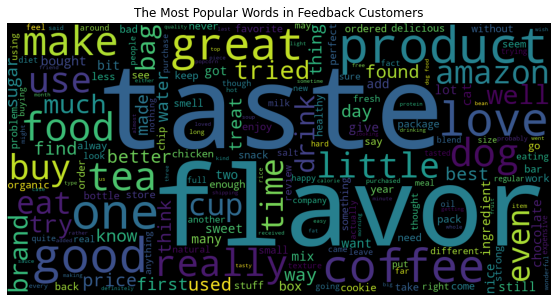

In [118]:
full_text = ' '.join(sample_data['Text'])
feedback_words = WordCloud(width=1000, height=500, stopwords=stop_words).generate(full_text)
plt.figure(figsize=(15,5))
plt.title('The Most Popular Words in Feedback Customers')
plt.imshow(feedback_words)
plt.axis('off')